In [1]:
#load data
import pandas as pd
import numpy as np


train = pd.read_csv('data/train.csv')

In [2]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train.drop(["ID", "TARGET"], axis=1, inplace=True)

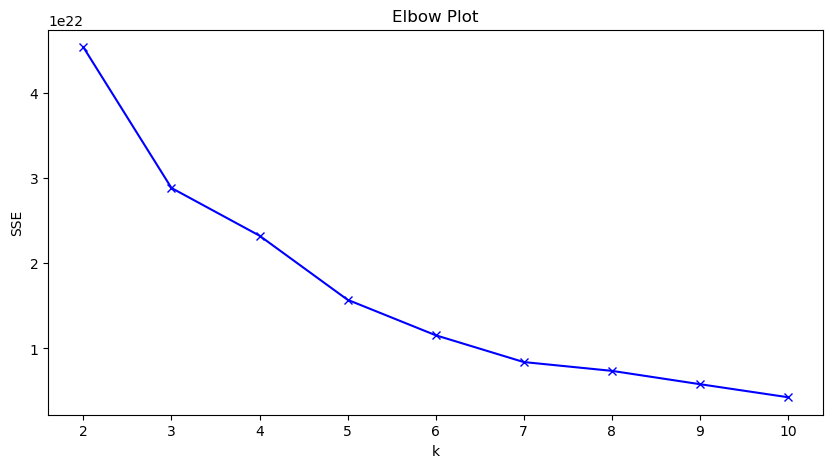

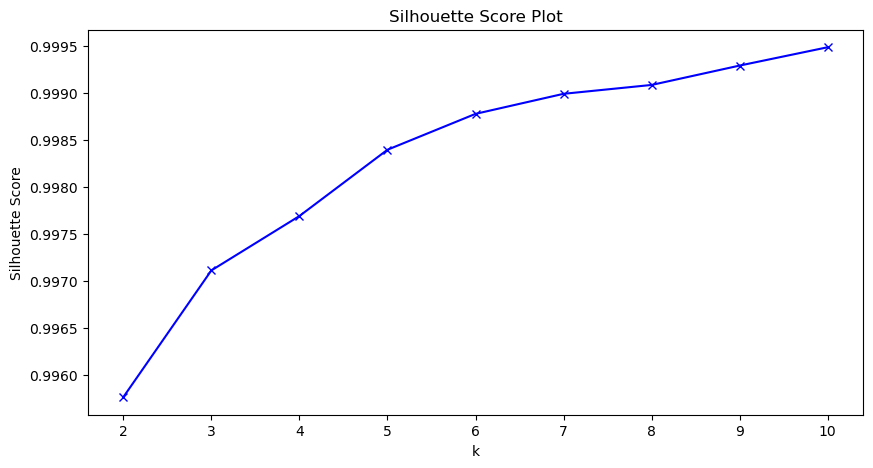

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X = train

# List to hold the SSE for each k
sse = []
silhouette = []

# List of potential k values
k_values = range(2, 11)

# Perform KMeans clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1,n_init="auto")
    kmeans.fit(X)
    
    # Append the SSE for the current k
    sse.append(kmeans.inertia_)
    
    # Append the silhouette score for the current k
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow plot
plt.figure(figsize=(10,5))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10,5))
plt.plot(k_values, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot')
plt.show()